# Tutorial API SportsDataIO

**Nome**: *Giovanni*

**Cognome**: *Imbesi*

**Matricola**: *1000006253*

**Corso**: Social Media Management

**Docente**: Antonino Furnari

**Anno Accademico**: *2021/2022*


## Introduzione
<p>
    Fondata nel 2008 come FantasyData LLC, SportsDataIO è un fornitore di dati sportivi che copre decine di migliaia di eventi sportivi durante tutto l'anno. Nel corso del primo decennio, hanno ampliato la copertura per tutti i principali campionati di calcio nordamericani e internazionali, con un'offerta di contenuti che fornisce dati, notizie e immagini a una vasta gamma di settori, tra cui giochi virtuali, editoria, trasmissione, campionati e squadre. Più recentemente, con l'abrogazione di PASPA, hanno cambiato nome in SportsDataIO e replicato la precedente missione di fornire feed virtuali specifici all'industria dei giochi virtuali insieme a una suite di widget per completare le API come metodo di consegna. Con sede a Philadelphia, PA e con operazioni di dati a Phoenix, AZ, SportsDataIO attualmente serve più di 200 clienti che vanno dalle startup alle organizzazioni aziendali.
</p>
<p>
    <a href="https://sportsdata.io/company"target="_blank">About you SportsDataIO</a><br>
<p>
    

## Free Trial
<p>
    SportsDataIO mette a disposizione un servizio di API gratuito cui è possibile accedere seguendo la documentazione 
 <img src="Sport.png">
</p>
    

Per cominciare è necessario scegliere una lega: in questo tutorial verranno analizzati i dati relativi al campionato di basket americano NBA.


<p>
    Cliccando su NBA verremo reindirizzati al seguente link <a target="blank_" href="https://sportsdata.io/cart/free-trial/nba">https://sportsdata.io/cart/free-trial/nba</a><br>.
    <img src="sportsDataRegistration.png">
</p>
<p>
    Da qui procederemo alla creazione di un account gratuito.
</p> 


## API KEY
<p>
    Una volta creato, nella sezione Subrscription, sarà possibile vedere l' API KEY associata al nostro account, tramite la quale ottenere i dati messi a disposizione dalla compagnia per la lega scelta.
    <br><img src="apiKey.png"><br>
    Cliccando su "Launch Developer Portal" si aprirà il portale di accesso con varie informazioni relative l'NBA.
    <br><img src="portaleDev.png"><br>
</p>
<p>
     Non sarà possibile accedere ai dati in mancanza di una API KEY: una volta completata la registrazione ed effettuato il login con il proprio account, questa apparirà già inserita.
        Per ottenere i dati è sufficiente realizzare delle richieste via HTTP GET,usando la propria chiave, verso gli endpoint forniti dal portale.
</p>

    
   
 
    
      

<p>
            Per la nostra analisi ci limiteremo ad utilizzare alcune librerie fondamentali per la gestione dei dati:<br>
    -la libreria requests ci permetterà di realizzare le richieste HTTP GET; <br>
    -pandas è una libreria essenziale per la creazione e gestione dei database;<br>
    -matplotlib è utile per la rappresentazione dei dati mediante dei grafici<br>
    -display da IPython, usata per poter rappresentare le immagini
    
</p>


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fg
from IPython import display


<p>
    Per prima cosa, è necessario ottenere i dati relativi ai giocatori e quindi ai loro salari.
    In particolare SportsDataIO mette a disposizione i suoi dati in formato json.
</p>

In [2]:
urlPlayers= "https://api.sportsdata.io/v3/nba/scores/json/Players?key=8adae53fad894151a48bb596dd3af164"
rPlayers=requests.get(urlPlayers)
jsonPlayers= rPlayers.json()
jsonPlayers


[{'PlayerID': 20000441,
  'SportsDataID': '',
  'Status': 'Active',
  'TeamID': 1,
  'Team': 'WAS',
  'Jersey': 3,
  'PositionCategory': 'G',
  'Position': 'SG',
  'FirstName': 'Bradley',
  'LastName': 'Beal',
  'Height': 75,
  'Weight': 207,
  'BirthDate': '1993-06-28T00:00:00',
  'BirthCity': 'St. Louis',
  'BirthState': 'MO',
  'BirthCountry': 'USA',
  'HighSchool': None,
  'College': 'Florida',
  'Salary': 33724200,
  'PhotoUrl': 'https://s3-us-west-2.amazonaws.com/static.fantasydata.com/headshots/nba/low-res/20000441.png',
  'Experience': 8,
  'SportRadarPlayerID': 'ff461754-ad20-4eeb-af02-2b46cc980b24',
  'RotoworldPlayerID': 1966,
  'RotoWirePlayerID': 3303,
  'FantasyAlarmPlayerID': 200464,
  'StatsPlayerID': 606912,
  'SportsDirectPlayerID': 750970,
  'XmlTeamPlayerID': 3395,
  'InjuryStatus': 'Scrambled',
  'InjuryBodyPart': 'Scrambled',
  'InjuryStartDate': None,
  'InjuryNotes': 'Scrambled',
  'FanDuelPlayerID': 15595,
  'DraftKingsPlayerID': 606912,
  'YahooPlayerID': 5009

<p>
    Inseriamo adesso i dati ottenuti in un dataframe.
</p>

In [3]:
df=pd.DataFrame(jsonPlayers)
df.head()


,PlayerID,SportsDataID,Status,TeamID,Team,Jersey,PositionCategory,Position,FirstName,LastName,...,DepthChartOrder,GlobalTeamID,FantasyDraftName,FantasyDraftPlayerID,UsaTodayPlayerID,UsaTodayHeadshotUrl,UsaTodayHeadshotNoBackgroundUrl,UsaTodayHeadshotUpdated,UsaTodayHeadshotNoBackgroundUpdated,NbaDotComPlayerID
0,20000441,,Active,1,WAS,3.0,G,SG,Bradley,Beal,...,0.0,20000001,Bradley Beal,606912.0,8247537.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2021-10-12T19:01:42,2021-10-13T14:52:58,203078
1,20000442,,Active,22,HOU,1.0,G,PG,John,Wall,...,NaN,20000022,John Wall,509456.0,8247185.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2021-10-07T14:51:18,2021-10-07T14:51:14,202322
2,20000443,,Active,26,GS,32.0,F,SF,Otto,Porter Jr.,...,1.0,20000026,Otto Porter Jr.,609256.0,8277110.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2021-11-11T12:30:17,2021-11-11T12:30:13,203490
3,20000452,,Active,23,NO,41.0,G,SG,Garrett,Temple,...,1.0,20000023,Garrett Temple,263903.0,8277056.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2021-10-10T22:47:27,2021-10-11T22:09:44,202066
4,20000453,,Active,5,ORL,31.0,G,SG,Terrence,Ross,...,1.0,20000005,Terrence Ross,550049.0,8247709.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2021-10-10T23:09:58,2021-10-10T23:10:04,203082


<p>
    Ottenuto il dataframe, possiamo procedere con le nostre analisi.
    Per cominciare, vogliamo trovare il giocatore più pagato della NBA e mostrarne una foto.  
</p>

FirstName       Stephen
LastName          Curry
Position             PG
Salary       4.5781e+07
Name: 15, dtype: object


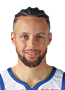

In [4]:
urlPhoto=df.loc[df['Salary'].idxmax()]['PhotoUrl']
bestPlayerStats=(df.loc[df['Salary'].idxmax()])
print(bestPlayerStats[['FirstName','LastName', 'Position','Salary']])
from IPython import display
display.Image(urlPhoto, width=100, height=100)


<p>
    L'NBA è una lega le cui squadre sono suddivise in due divisioni: la Eastern e la Western conference.
    Determiniamo la conference più costosa, ovvero quella le cui squadre hanno,in totale,un monte ingaggi maggiore.
    Per raggiungere il nostro scopo non sono necessarie tutte le informazioni fornite dall'API, dunque, selezioniamo solo gli attributi fondamentali
    
</p>


In [5]:
dbPlayers=df[['PlayerID', 'Team','Salary']].copy()
dbPlayers.head()


,PlayerID,Team,Salary
0,20000441,WAS,33724200.0
1,20000442,HOU,44310840.0
2,20000443,GS,1669178.0
3,20000452,NO,4910000.0
4,20000453,ORL,12500000.0


<p>
    L'idea è quella di utilizzare una group by sulle squadre, al fine di ottenere per ognuna di esse, il totale degli stipendi dei rispettivi giocatori.
</p>

In [6]:
dbSalaryTeams=pd.DataFrame(dbPlayers.groupby(by=["Team"], as_index=False).sum())
del dbSalaryTeams['PlayerID']
dbSalaryTeams


,Team,Salary
0,ATL,134732368.0
1,BKN,167465516.0
2,BOS,141588609.0
3,CHA,106223133.0
4,CHI,135195386.0
5,CLE,131976438.0
6,DAL,118605280.0
7,DEN,134808541.0
8,DET,79677933.0
9,GS,175192325.0


<p>
    Dobbiamo ora ottenere i dati relativi alle squadre, al fine di determinare la conference cui appartengono.
    Per farlo sfruttiamo un altro URL fornitoci da SportsDataIO, il quale comprende diversi dati sui Team NBA.
</p>


In [7]:
url2="https://api.sportsdata.io/v3/nba/scores/json/teams?key=8adae53fad894151a48bb596dd3af164"
rTeams=requests.get(url2)
jsonTeams=rTeams.json()
jsonTeams


[{'TeamID': 1,
  'Key': 'WAS',
  'Active': True,
  'City': 'Washington',
  'Name': 'Wizards',
  'LeagueID': 3,
  'StadiumID': 1,
  'Conference': 'Eastern',
  'Division': 'Southeast',
  'PrimaryColor': '002B5C',
  'SecondaryColor': 'E31837',
  'TertiaryColor': 'C4CED4',
  'QuaternaryColor': 'FFFFFF',
  'WikipediaLogoUrl': 'https://upload.wikimedia.org/wikipedia/en/0/02/Washington_Wizards_logo.svg',
  'WikipediaWordMarkUrl': None,
  'GlobalTeamID': 20000001,
  'NbaDotComTeamID': 1610612764},
 {'TeamID': 2,
  'Key': 'CHA',
  'Active': True,
  'City': 'Charlotte',
  'Name': 'Hornets',
  'LeagueID': 3,
  'StadiumID': 2,
  'Conference': 'Eastern',
  'Division': 'Southeast',
  'PrimaryColor': '1D1160',
  'SecondaryColor': '00788C',
  'TertiaryColor': 'A1A1A4',
  'QuaternaryColor': '7AB2DD',
  'WikipediaLogoUrl': 'https://upload.wikimedia.org/wikipedia/en/c/c4/Charlotte_Hornets_%282014%29.svg',
  'WikipediaWordMarkUrl': '',
  'GlobalTeamID': 20000002,
  'NbaDotComTeamID': 1610612766},
 {'TeamI

<p>
    Estraiamo solo i dati relativi alla conference e la feature KEY del team. Per una più facile gestione dei due dataframe, andiamo a rinominare la colonna 'Key' come 'Team'.
</p>

In [8]:
df2=pd.DataFrame(jsonTeams)
dbTeams=df2[['Key', 'Conference']].copy()
dbTeams=dbTeams.rename(columns={'Key': 'Team'})
dbTeams


,Team,Conference
0,WAS,Eastern
1,CHA,Eastern
2,ATL,Eastern
3,MIA,Eastern
4,ORL,Eastern
5,NY,Eastern
6,PHI,Eastern
7,BKN,Eastern
8,BOS,Eastern
9,TOR,Eastern


<p>
    Ottenuti e formattati i nostri dataframe, ci limitiamo ad effettuare una join sulla key 'Team', al fine di associare ad ogni squadra la corrispettiva Conference.
</p>

In [9]:
dbMerged=pd.merge(dbTeams, dbSalaryTeams)
dbMerged


,Team,Conference,Salary
0,WAS,Eastern,134736457.0
1,CHA,Eastern,106223133.0
2,ATL,Eastern,134732368.0
3,MIA,Eastern,132737483.0
4,ORL,Eastern,115482329.0
5,NY,Eastern,141997352.0
6,PHI,Eastern,141660440.0
7,BKN,Eastern,167465516.0
8,BOS,Eastern,141588609.0
9,TOR,Eastern,135687580.0


<p>
    Potrebbe essere interessante capire graficamente qual è la squadra col monte ingaggi più alto. Per farlo possiamo sfruttare il metodo plot.
</p>

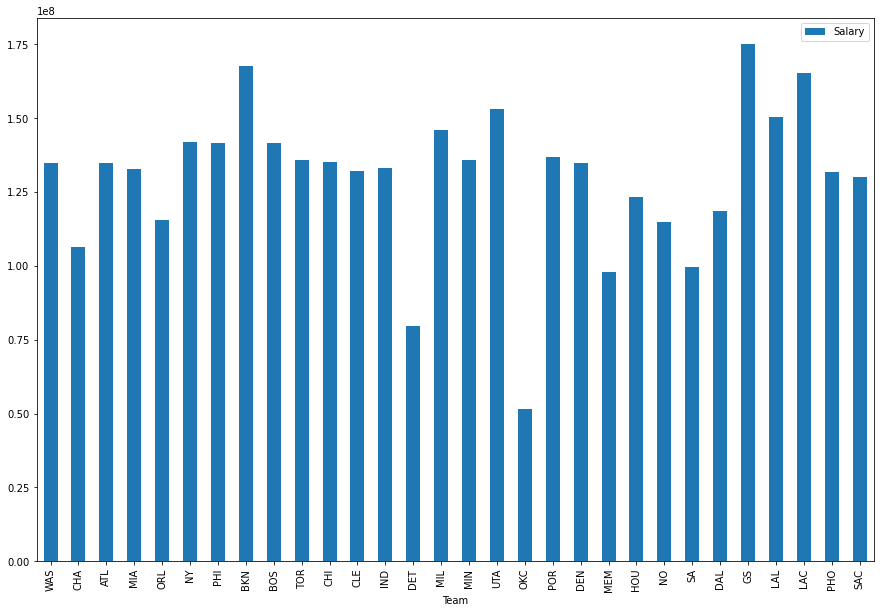

In [10]:
plt.rcParams['figure.figsize'] = [15, 10]
dbMerged.plot(x='Team', y = 'Salary', kind='bar')
plt.show()


<p>
    Infine, effettuando una group by sull'attributo Conference ed una sum, otteniamo il monte ingaggi totale per entrambe le Conference.
</p>

  Conference        Salary
0    Eastern  1.978182e+09
1    Western  1.918180e+09


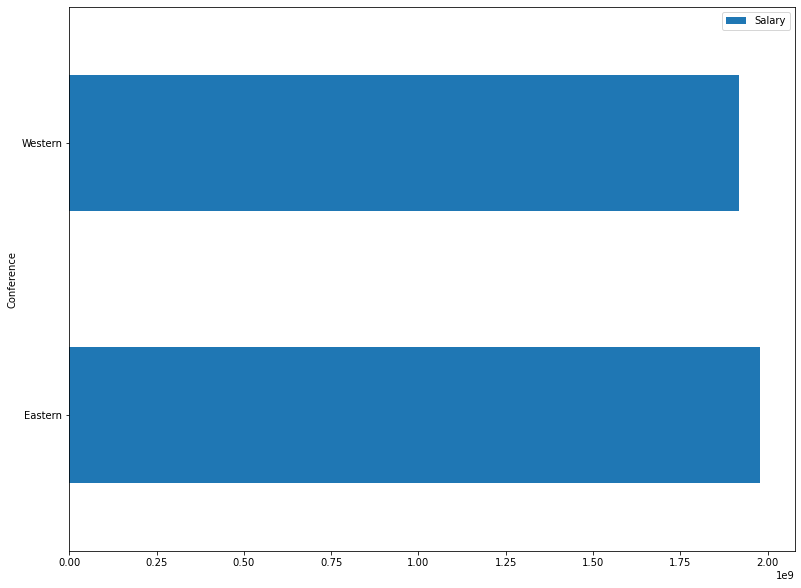

In [11]:
print(dbMerged.groupby(by='Conference', as_index=False).sum())
dbConference=dbMerged.groupby(by='Conference', as_index=False).sum()
plt.rcParams['figure.figsize'] = [13, 10]
dbConference.plot(x='Conference', y = 'Salary', kind='barh')
plt.show()


## Considerazioni
<p>Dal grafico risulta evidente che la Eastern Conference è quella più costosa, nonostante la differenza non sia particolarmente evidente, merito delle politiche economiche della NBA che cerca di garantire dunque un certo equilibrio.
</p>

## Conclusione
<p>
    Le API messe a disposizione da SportsDataIO sono di facile utilizzo e comprensione, ma soprattutto permettono di accedere ad una buona quantità di dati relativi non solo l'NBA ma anche altri sport.
    I database vengono costantemente aggiornati, ed il formato in cui vengono condivise le informazioni consente di analizzarle fin da subito senza particolari problemi di conversione o formattazione.
    
<p>